<AxesSubplot:xlabel='x', ylabel='y'>

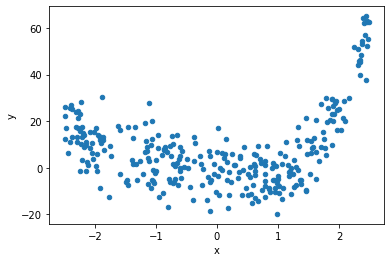

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.to_csv('dane_do_regresji.csv',index=None)
df.plot.scatter(x='x',y='y')

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['x']], df[['y']], test_size= 0.2, random_state=42)

In [92]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [93]:
import sklearn.neighbors
knn_3_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
knn_3_reg .fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [94]:
knn_5_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
knn_5_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [95]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature_2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feature_2.fit_transform(X_train)
poly_2_reg = LinearRegression()
poly_2_reg.fit(X_poly, y_train)
poly_2_reg.predict(poly_feature_2.fit_transform(X_test.head()))

array([[-5.54013812],
       [-5.21417804],
       [18.17942186],
       [-3.63583483],
       [-4.47917529]])

In [96]:
poly_feature_3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_feature_3.fit_transform(X_train)
poly_3_reg = LinearRegression()
poly_3_reg.fit(X_poly, y_train)
poly_3_reg.predict(poly_feature_3.fit_transform(X_test.head()))

array([[-4.41095438],
       [-0.31873993],
       [12.10569094],
       [ 2.65183186],
       [ 1.276573  ]])

In [97]:
poly_feature_4 = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_feature_4.fit_transform(X_train)
poly_4_reg = LinearRegression()
poly_4_reg.fit(X_poly, y_train)
poly_4_reg.predict(poly_feature_4.fit_transform(X_test.head()))

array([[-0.61727814],
       [ 1.20799949],
       [14.5538217 ],
       [ 1.98924169],
       [ 1.65109214]])

In [98]:
poly_feature_5 = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_feature_5.fit_transform(X_train)
poly_5_reg = LinearRegression()
poly_5_reg.fit(X_poly, y_train)
poly_5_reg.predict(poly_feature_5.fit_transform(X_test.head()))

array([[-0.47869305],
       [ 1.67465028],
       [14.6593191 ],
       [ 2.40246509],
       [ 2.11510966]])

In [99]:
from sklearn.metrics import mean_squared_error

In [100]:
df  = pd.DataFrame({'train_mse':[mean_squared_error(y_train, lin_reg.predict(X_train)),
                                mean_squared_error(y_train, knn_3_reg.predict(X_train)),
                                mean_squared_error(y_train, knn_5_reg.predict(X_train)),
                                mean_squared_error(y_train, poly_2_reg.predict(poly_feature_2.fit_transform(X_train))),
                                mean_squared_error(y_train, poly_3_reg.predict(poly_feature_3.fit_transform(X_train))),
                                mean_squared_error(y_train, poly_4_reg.predict(poly_feature_4.fit_transform(X_train))),
                                mean_squared_error(y_train, poly_5_reg.predict(poly_feature_5.fit_transform(X_train)))],
                    'test_mse':[mean_squared_error(y_test, lin_reg.predict(X_test)),
                                mean_squared_error(y_test, knn_3_reg.predict(X_test)),
                                mean_squared_error(y_test, knn_5_reg.predict(X_test)),
                                mean_squared_error(y_test, poly_2_reg.predict(poly_feature_2.fit_transform(X_test))),
                                mean_squared_error(y_test, poly_3_reg.predict(poly_feature_3.fit_transform(X_test))),
                                mean_squared_error(y_test, poly_4_reg.predict(poly_feature_4.fit_transform(X_test))),
                                mean_squared_error(y_test, poly_5_reg.predict(poly_feature_5.fit_transform(X_test)))]
                    })


In [101]:
df

,train_mse,test_mse
0,239.215090,293.002140
1,43.396032,92.069717
2,53.070157,86.189167
3,101.244964,122.758076
4,73.110401,70.561330
5,62.121043,72.332950
6,61.927780,72.182553


In [102]:
import pickle
filehandler = open("mse.pkl","wb")
pickle.dump(df,filehandler)
file.close()

In [103]:
lista = [(lin_reg, None), (knn_3_reg, None), (knn_5_reg, None), (poly_2_reg, poly_feature_2), (poly_3_reg, poly_feature_3), (poly_4_reg, poly_feature_4),
(poly_5_reg, poly_feature_5)]

In [104]:
filehandler = open("reg.pkl","wb")
pickle.dump(lista,filehandler)
file.close()